<h1 Style='color:#294380;text-align: center'>Banco Uno</h1>
<h2 Style='color:#294380;text-align: center'>Implementación PCA</h2>

<h3 Style='color:#fa4b00;text-align: left'>1.Importe de Librerías</h3>

In [14]:
import pandas as pd      
import numpy as np     
import matplotlib.pyplot as plt 
import matplotlib as mpl

from sklearn import linear_model  
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

<h3 Style='color:#fa4b00;text-align: left'>2.Importe Set de Datos</h3>

In [15]:
credit = pd.read_excel("credit.xlsx")
credit.drop(['Unnamed: 0'], axis=1,inplace=True)
credit.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default


In [16]:
credit.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

<p Style = "text-align: justify"> Excluir la variante "Y", es decir lo que estamos tratando de predecir, en este caso corresponde a la columna "default payment next month".
Se crea un set de datos nuevo, que no contenga esa columna.</p>

In [17]:
credit = credit.rename(columns={'default payment next month':'Y'})

<h3 Style='color:#fa4b00;text-align: left'>3.Creación del Análisis de Componentes Principales (PCA)</h3>

<p Style = "text-align: justify"> Debido al tamaño del Data Frame, para estos efectos se va a estar trabajando con 2 componentes principales. El propósito del PCA es poder describir el set de datos con la menor cantidad de características.</p> 

<h4 Style='color:#0fbab7;text-align: left'>3.1 Separación de los valores 'X' y 'Y', estandarización de datos entre '0' a '1/h4>


In [19]:
features = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
             'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
            'PAY_AMT5', 'PAY_AMT6']


x = credit.loc[:, features].values

y = credit.loc[:,['Y']].values 

x = StandardScaler().fit_transform(x)
print (x)

[[-1.12642689 -1.20840397  1.77647823 ... -0.34328006 -0.29509662
  -0.25656677]
 [-0.35402725 -0.99677208 -0.89437003 ... -0.27310016 -0.29509662
  -0.15692781]
 [-0.58574714 -0.15024451 -0.00408727 ... -0.27310016 -0.23589944
  -0.00746937]
 ...
 [-0.27678728 -1.20840397  0.88619548 ... -0.27302998 -0.23951047
  -0.20609964]
 [-0.43126721 -0.89095613 -0.00408727 ... -0.22411459 -0.18197081
  -0.16649315]
 [ 0.26389247 -0.67932424 -0.00408727 ... -0.20965753 -0.29438625
   0.0036902 ]]


<h4 Style='color:#0fbab7;text-align: left'>3.2 Creación de 2 componentes, y creación de un data frame que contenga solo estas dos columnas</h4>

In [20]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal_component_1', 'principal_component_2'])

principalDf.head(10)

,principal_component_1,principal_component_2
0,-1.870265,-0.761333
1,-0.767839,-2.018214
2,-0.832976,-0.968936
3,-0.222358,-0.818196
4,-0.713468,0.111323
5,-0.213886,-0.812272
6,13.819351,6.281669
7,-1.785742,-0.355035
8,-0.697270,-1.563671
9,-2.741159,1.646898


<h4 Style='color:#0fbab7;text-align: left'>3.3 Se crea un nuevo Data Frame anexando 'Y'</h4>

In [21]:
finalDf = pd.concat([principalDf, credit[['Y']]], axis = 1)
finalDf.head(10)

,principal_component_1,principal_component_2,Y
0,-1.870265,-0.761333,default
1,-0.767839,-2.018214,default
2,-0.832976,-0.968936,not default
3,-0.222358,-0.818196,not default
4,-0.713468,0.111323,not default
5,-0.213886,-0.812272,not default
6,13.819351,6.281669,not default
7,-1.785742,-0.355035,not default
8,-0.697270,-1.563671,not default
9,-2.741159,1.646898,not default


<h4 Style='color:#0fbab7;text-align: left'>3.4 Visualización Gráfica</h4>

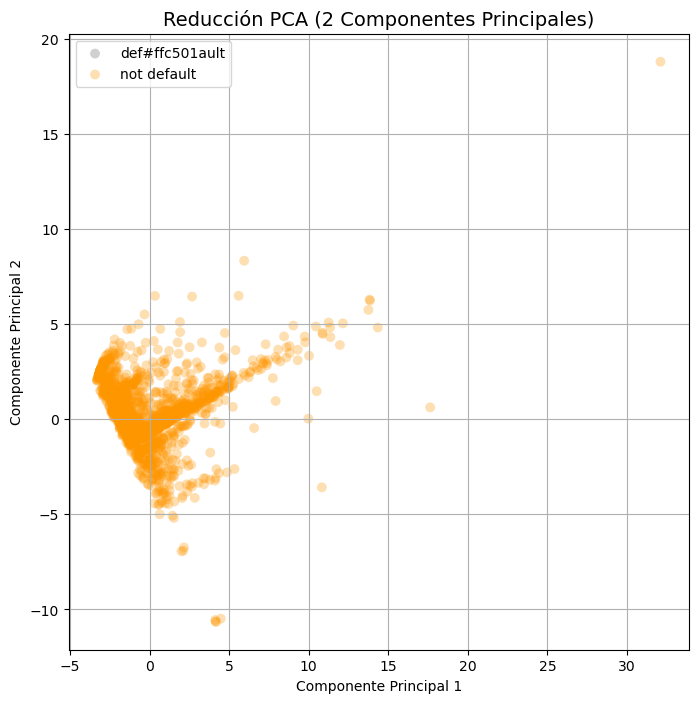

In [23]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Componente Principal 1', fontsize = 10)
ax.set_ylabel('Componente Principal 2', fontsize = 10)
ax.set_title('Reducción PCA (2 Componentes Principales)', fontsize = 14)

targets = ['def#ffc501ault', 'not default']
colors = ['#686466','#fe9600']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Y'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal_component_1']
               , finalDf.loc[indicesToKeep, 'principal_component_2']
               , c = color
               , s = 50
               ,alpha=0.3
               ,edgecolors='none')
ax.legend(targets)
ax.grid()

In [24]:
pca.explained_variance_ratio_

array([0.3357123 , 0.20397228])

<h4 Style='color:#0fbab7;text-align: left'>3.5 Comprobación Implementación MRL</h4>

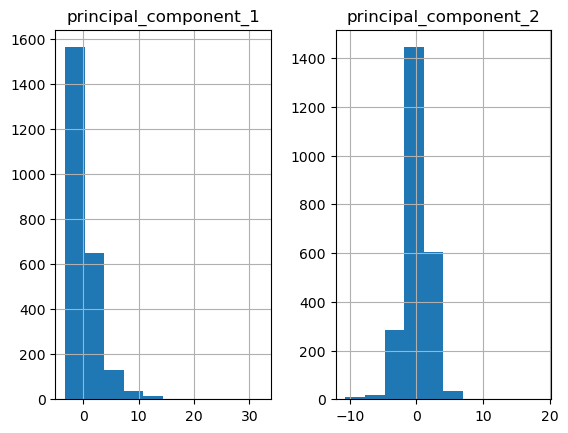

In [25]:
viz = finalDf[['principal_component_1','principal_component_2','Y']]
viz.hist()
plt.show()

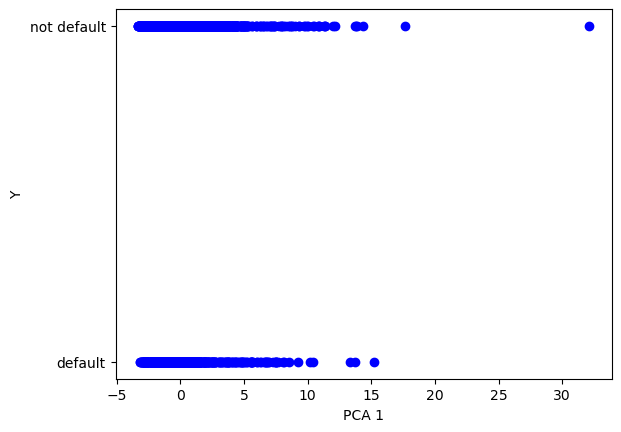

In [26]:
plt.scatter(finalDf.principal_component_1, finalDf.Y,  color='blue')
plt.xlabel("PCA 1")
plt.ylabel("Y")
plt.show()

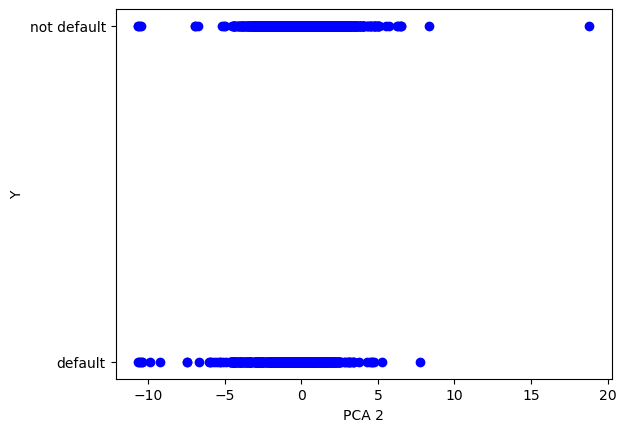

In [27]:
plt.scatter(finalDf.principal_component_2, finalDf.Y,  color='blue')
plt.xlabel("PCA 2")
plt.ylabel("Y")
plt.show()

<p Style = "text-align: justify"> Como puede observarse anteriormente es posible concluir que no es posible utilizar el método de regresión simple para predecir esta variable, esto se debe a que nuestra variable predictora es catégorica. Para poder ser implementado 'Y' o la variable predictora debe ser una variable númerica continua. Para poder realizar este ejercico se necesita de otros algoritmos de clasificación.</p> 